# Data Wrangling using Insurance Data
## Insurance case study - Agency Data

In [51]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/agencyperformance/finalapi.csv


In [52]:
# Reading the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/agencyperformance/finalapi.csv')

### set the max columns to none to be able to see values from all columns
pd.set_option('display.max_columns', None)

df.head(10)

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT,MONTHS,RETENTION_RATIO,LOSS_RATIO,LOSS_RATIO_3YR,GROWTH_RATE_3YR,AGENCY_APPOINTMENT_YEAR,ACTIVE_PRODUCERS,MAX_AGE,MIN_AGE,VENDOR_IND,VENDOR,PL_START_YEAR,PL_END_YEAR,COMMISIONS_START_YEAR,COMMISIONS_END_YEAR,CL_START_YEAR,CL_END_YEAR,ACTIVITY_NOTES_START_YEAR,ACTIVITY_NOTES_END_YEAR,CL_BOUND_CT_MDS,CL_QUO_CT_MDS,CL_BOUND_CT_SBZ,CL_QUO_CT_SBZ,CL_BOUND_CT_eQT,CL_QUO_CT_eQT,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3,BOILERMACH,CL,IN,2005,0,0,0,40.0,3074.63,149.00,3005.77,0.00,8,99999.0,0.000000,99999.000000,99999.000000,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
1,3,3,BOILERMACH,CL,IN,2006,0,0,0,151.0,6562.28,5438.55,6433.44,0.00,12,99999.0,0.000000,0.695390,99999.000000,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
2,3,3,BOILERMACH,CL,IN,2007,0,0,0,40.0,6205.11,6562.28,6357.09,0.00,12,99999.0,0.000000,0.472729,99999.000000,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
3,3,3,BOILERMACH,CL,IN,2008,0,0,0,69.0,5159.89,6205.11,5315.01,0.00,12,99999.0,0.000000,0.445760,-0.082902,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
4,3,3,BOILERMACH,CL,IN,2009,0,0,0,28.0,4527.71,5159.89,4706.47,0.00,12,99999.0,0.000000,0.337674,-0.148078,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
5,3,3,BOILERMACH,CL,IN,2010,0,0,0,120.0,4768.49,4527.71,4653.02,8972.35,12,99999.0,1.881591,0.338719,-0.143915,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
6,3,3,BOILERMACH,CL,IN,2011,0,0,0,231.0,4988.11,4768.49,4790.67,3525.92,12,99999.0,0.706865,0.357038,-0.078702,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
7,3,3,BOILERMACH,CL,IN,2012,0,0,0,0.0,4905.49,4988.11,5005.71,0.00,12,99999.0,0.000000,0.327769,-0.050957,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
8,3,3,BOILERMACH,CL,IN,2013,0,0,0,111.0,4545.51,4905.49,4749.26,0.00,12,99999.0,0.000000,0.448945,-0.000055,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0
9,3,3,BOILERMACH,CL,IN,2014,0,0,0,213.0,3662.71,4545.51,3838.80,0.00,12,99999.0,0.000000,0.381667,-0.115754,1957,14,85,48,N,Unknown,99999,99999,99999,99999,99999,99999,99999,99999,0,1,0,0,0,0,0,0,0,103,50,288,0,0,0,0


# Outlier & Missing Value Treatment - (You'll learn: REPLACE)

### In the above table it is observed that lot of columns carry value of 99999. Specifically date columns have this high value which clearly represent missing value. Replacing all 99999 with NaN (missing values)

In [53]:
df.replace(99999, np.nan, inplace=True)
df.head(10)

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT,MONTHS,RETENTION_RATIO,LOSS_RATIO,LOSS_RATIO_3YR,GROWTH_RATE_3YR,AGENCY_APPOINTMENT_YEAR,ACTIVE_PRODUCERS,MAX_AGE,MIN_AGE,VENDOR_IND,VENDOR,PL_START_YEAR,PL_END_YEAR,COMMISIONS_START_YEAR,COMMISIONS_END_YEAR,CL_START_YEAR,CL_END_YEAR,ACTIVITY_NOTES_START_YEAR,ACTIVITY_NOTES_END_YEAR,CL_BOUND_CT_MDS,CL_QUO_CT_MDS,CL_BOUND_CT_SBZ,CL_QUO_CT_SBZ,CL_BOUND_CT_eQT,CL_QUO_CT_eQT,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3.0,BOILERMACH,CL,IN,2005,0,0,0.0,40.0,3074.63,149.00,3005.77,0.00,8,NaN,0.000000,NaN,NaN,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
1,3,3.0,BOILERMACH,CL,IN,2006,0,0,0.0,151.0,6562.28,5438.55,6433.44,0.00,12,NaN,0.000000,0.695390,NaN,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
2,3,3.0,BOILERMACH,CL,IN,2007,0,0,0.0,40.0,6205.11,6562.28,6357.09,0.00,12,NaN,0.000000,0.472729,NaN,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
3,3,3.0,BOILERMACH,CL,IN,2008,0,0,0.0,69.0,5159.89,6205.11,5315.01,0.00,12,NaN,0.000000,0.445760,-0.082902,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
4,3,3.0,BOILERMACH,CL,IN,2009,0,0,0.0,28.0,4527.71,5159.89,4706.47,0.00,12,NaN,0.000000,0.337674,-0.148078,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
5,3,3.0,BOILERMACH,CL,IN,2010,0,0,0.0,120.0,4768.49,4527.71,4653.02,8972.35,12,NaN,1.881591,0.338719,-0.143915,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
6,3,3.0,BOILERMACH,CL,IN,2011,0,0,0.0,231.0,4988.11,4768.49,4790.67,3525.92,12,NaN,0.706865,0.357038,-0.078702,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
7,3,3.0,BOILERMACH,CL,IN,2012,0,0,0.0,0.0,4905.49,4988.11,5005.71,0.00,12,NaN,0.000000,0.327769,-0.050957,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
8,3,3.0,BOILERMACH,CL,IN,2013,0,0,0.0,111.0,4545.51,4905.49,4749.26,0.00,12,NaN,0.000000,0.448945,-0.000055,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0
9,3,3.0,BOILERMACH,CL,IN,2014,0,0,0.0,213.0,3662.71,4545.51,3838.80,0.00,12,NaN,0.000000,0.381667,-0.115754,1957.0,14.0,85.0,48.0,N,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,50.0,288.0,0.0,0.0,0.0,0.0


### After treating all 99999 as NaN, a quick aggregation of mean of LOSS_RATIO by AGENCY_ID reveals that some agency_id's have a significantly high loss ratio. These high loss ratios are occurring due to some large numbers in the dataset represengting missing value. These need to be treated. As an example, see the mean loss ratio for agency id = 11 or 16, 99 , 123 etc... It is as high as 99998, clearly indicating that there are some outliers/high values that need to be treated.

# Slicing (loc, isin)

In [54]:
#Three different ways to slice data.
#First: using loc to select rows with column values between a range
df_agency_id_11_16 = df.loc[(df['LOSS_RATIO'] >= 99990) & (df['LOSS_RATIO'] <= 99999)]
df_agency_id_11_16[['AGENCY_ID','STAT_PROFILE_DATE_YEAR','LOSS_RATIO']].head()

,AGENCY_ID,STAT_PROFILE_DATE_YEAR,LOSS_RATIO
523,11,2005,99997.0
600,11,2007,99997.0
619,12,2011,99997.0
621,12,2013,99997.0
781,16,2015,99998.0


In [55]:
#Second: using loc to select rows where the column/feature equals a specifc value
df_agency_id_123 = df.loc[df['AGENCY_ID'] == 123]
df_agency_id_123[['AGENCY_ID','STAT_PROFILE_DATE_YEAR','LOSS_RATIO']].head()

,AGENCY_ID,STAT_PROFILE_DATE_YEAR,LOSS_RATIO
2255,123,2008,99997.0
2256,123,2009,99997.0
2257,123,2010,99997.0
2258,123,2011,99997.0
2259,123,2012,NaN


In [56]:
#Third: using loc to select rows that have a specific value for a column/feature
df_lossratio_outliers = df.loc[df['AGENCY_ID'].isin([11,16,99,123])]
df_lossratio_outliers[['AGENCY_ID','STAT_PROFILE_DATE_YEAR','LOSS_RATIO']].head()

,AGENCY_ID,STAT_PROFILE_DATE_YEAR,LOSS_RATIO
511,11,2005,0.0
512,11,2006,0.0
513,11,2007,0.0
514,11,2008,0.0
515,11,2009,0.0


# Further Outlier & Missing Value Treatment (REPLACE, GROUP BY, AGGREGATION)

### Replace all extremely high values such as the ones >99990 with missing values (NaN)
### If required, these missing values/outliers can later be replaced with an appropriate statistic such as mean/median by agency_id/product type/region etc...

In [57]:
df["LOSS_RATIO"].replace((99995,99996,99997,99998), np.nan, inplace=True)
df["LOSS_RATIO_3YR"].replace((99995,99996,99997,99998), np.nan, inplace=True)
df["RETENTION_RATIO"].replace((99995,99996,99997,99998), np.nan, inplace=True)
df["GROWTH_RATE_3YR"].replace((99995,99996,99997,99998), np.nan, inplace=True)

### Now let's look at the above four metrics/KPI's grouped by agency_id. 
### I have selected two more KPI's viz... Written premium & Inforce Policy Count & taken a sum of those.

In [58]:
df_kpi = df.groupby('AGENCY_ID').agg({"LOSS_RATIO":['mean'],
                         'LOSS_RATIO_3YR':['mean'],
                         'RETENTION_RATIO':['mean'],
                         'GROWTH_RATE_3YR':['mean'],              
                         'WRTN_PREM_AMT':'sum', 
                         'POLY_INFORCE_QTY':'sum'})
df_kpi

,LOSS_RATIO,LOSS_RATIO_3YR,RETENTION_RATIO,GROWTH_RATE_3YR,WRTN_PREM_AMT,POLY_INFORCE_QTY
,mean,mean,mean,mean,sum,sum
AGENCY_ID,,,,,,
3,0.724664,0.518742,0.888239,-0.053414,15971825.30,124056
11,0.070577,0.312397,0.523402,-0.572303,81859.86,638
12,0.507035,0.496877,0.583763,-0.518954,880554.17,13051
14,0.000000,NaN,NaN,NaN,0.00,0
16,0.347536,0.354989,0.782491,0.034164,2210858.42,21988
...,...,...,...,...,...,...
9962,NaN,NaN,NaN,NaN,0.00,0
9966,0.410019,0.480702,0.597101,-0.461990,327462.81,3374


### At this juncture let's look at the data for a specific agency id. 
### This to manually eyeball & ensure the above data cleansing operations have worked as expected.

In [59]:
df_agency_id_123 = df.loc[df['AGENCY_ID'] == 123]
df_agency_id_123[['AGENCY_ID','STAT_PROFILE_DATE_YEAR','LOSS_RATIO']].head()

,AGENCY_ID,STAT_PROFILE_DATE_YEAR,LOSS_RATIO
2255,123,2008,NaN
2256,123,2009,NaN
2257,123,2010,NaN
2258,123,2011,NaN
2259,123,2012,NaN


# Definitions of Insurance KPI's/Acronyms (Definitions of LOSS RATIO, WRITTEN PREMIUM)

### Loss Ratio = (Incurred Losses in claims paid out / Earned Premium revenue during the same time-period) * 100
### (Def. of Loss Ration from CHATGPT): 
### A loss ratio below 100% indicates that the insurer's underwriting is profitable, meaning that the company is receiving more in premiums than it is paying out in claims.

### Written Premium Amount = The written premium amount is an important figure used by insurance companies to assess their financial performance, growth, and market share. 
### However, it's crucial to remember that written premiums do not directly translate into profit, as they don't account for claims and other expenses incurred by the insurance company.

### In the given dataset, the LOSS_RATIO = PRD_INCRD_LOSSES_AMT / WRTN_PREM_AMT

# Using subplots

### Let's plot the various KPI's for each agency_id

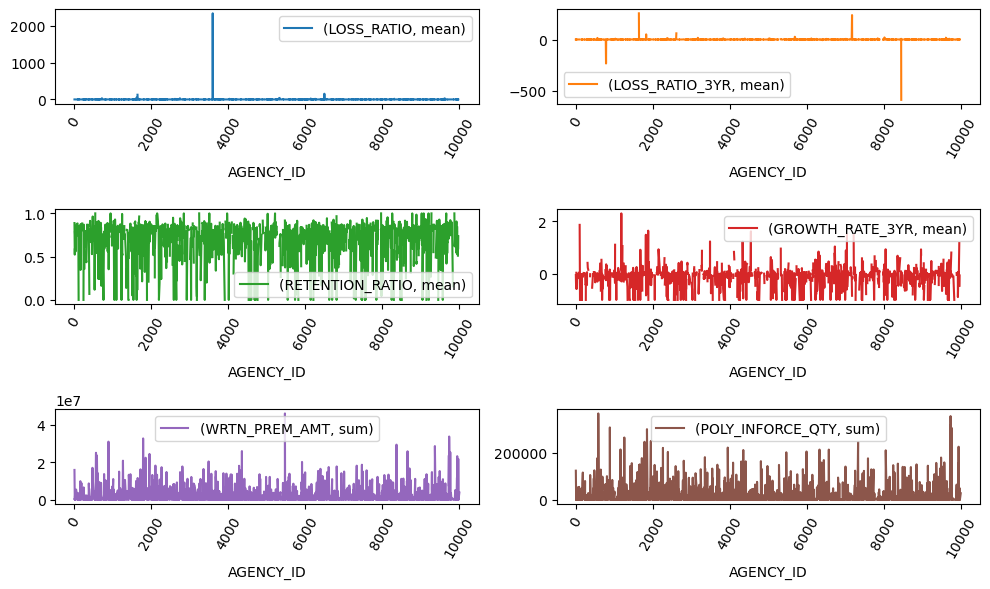

In [60]:
### The below plots are to see the distribution of the key performance indicators/metrics (KPI's)
import matplotlib.pyplot as plt
fig, a = plt.subplots(3, 2, figsize=(10, 6), tight_layout=True)
df_kpi.plot(ax=a, subplots=True, rot=60);

### Some product types could have low ticket size (smaller premium amount) in which case even a good agency may get dwarfed infront of another agency who sell very few high ticket size products
### It is important to assess a holistic performance rather than relying on let say high written premium amount or inforce policy count alone

### Look at the performance in the last 3 or 5 years. Choose both options
### Find out top companies who have the highest Writtem Premium in the last 5 years & top growth rate in last 3 years & lowest loss ratio in the last 3 years
### In the next kernel (hopefully coming soon) i will post the K-means clustering solution to identify agency leaders

# Aggregation (GROUP BY, SORTING - ascending & descending, SLICING using Head(x) & plotting BAR Charts)

### Slicing the dataframes to obtain only top 10 agency_id's by different KPI's
### Eg. Below code will provide the top 10 agency_id's that have the highest policy inforce count (Ascending = False)
### On similar lines, top 10 agency_ID's with the lowest loss ratio in the last 3 years will be captured in the dataframe (ascending = True)

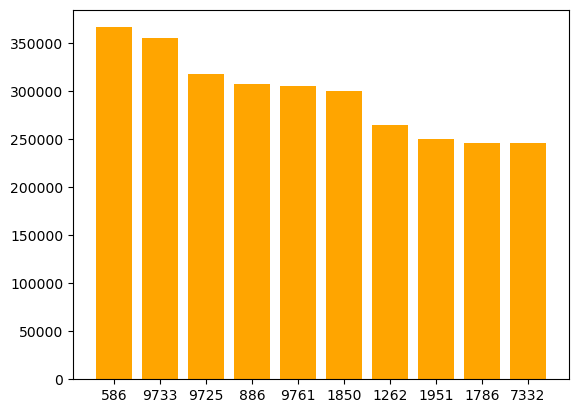

In [61]:
Pol_Inf_Qty = df.groupby('AGENCY_ID', as_index=False)['POLY_INFORCE_QTY'].sum().sort_values(by='POLY_INFORCE_QTY', ascending=False).head(10)
WRTN_PREM_AMT = df.groupby('AGENCY_ID', as_index=False)['WRTN_PREM_AMT'].sum().sort_values(by='WRTN_PREM_AMT', ascending=False).head(10)
GROWTH_RATE_3YR = df.groupby('AGENCY_ID', as_index=False)['GROWTH_RATE_3YR'].sum().sort_values(by='GROWTH_RATE_3YR', ascending=False).head(10)
LOSS_RATIO_3YR = df.groupby('AGENCY_ID', as_index=False)['LOSS_RATIO_3YR'].sum().sort_values(by='LOSS_RATIO_3YR', ascending=True).head(10)

plt.bar(Pol_Inf_Qty['AGENCY_ID'].astype(str),Pol_Inf_Qty['POLY_INFORCE_QTY'],color="orange")
plt.show()

### Below chart shows top 10 agency ID's with the highest written premium amount
### Note that the agency ID 1786 is 9th wrt the number of inforce policy count but 3rd wrt the written premium amount
### This could be due to the high ticket size (premium amount) per inforce policy potentially as a result of the product & customer demographic mix

<function matplotlib.pyplot.show(close=None, block=None)>

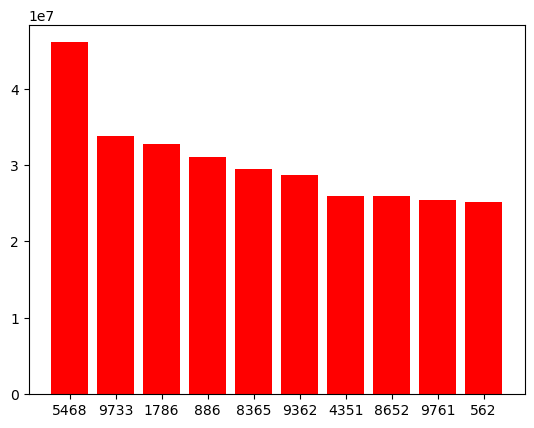

In [62]:
plt.bar(WRTN_PREM_AMT['AGENCY_ID'].astype(str),WRTN_PREM_AMT['WRTN_PREM_AMT'],color="red")
plt.show

# BUSINESS DECISION - Finding the best performing agencies (agency_ID)
## To assess performance let's use the last three years of data

### I'll select only data for last three years i.e. 2013 till 2015. Let's slice the dataset accordingly.
### Post silcing the data, let's aggregate the KPI's & group by Agency ID. 
### This will provide the KPI's by each agency ID & will help assess the relative performance

In [63]:
df_lst_3_yr = df[df.STAT_PROFILE_DATE_YEAR.isin([2013, 2014, 2015])]
df_lst_3_yr = df_lst_3_yr[["AGENCY_ID","LOSS_RATIO","LOSS_RATIO_3YR","RETENTION_RATIO","GROWTH_RATE_3YR","WRTN_PREM_AMT","POLY_INFORCE_QTY"]]
df_lst_3_yr

# the below syntax creates agency_id as an index in the dataframe
df_lst_3_yr = df_lst_3_yr.groupby('AGENCY_ID').agg({"LOSS_RATIO_3YR":['mean'],
#                          'LOSS_RATIO_3YR':['mean'],
                         'RETENTION_RATIO':['mean'],
                         'GROWTH_RATE_3YR':['mean'],              
                         'WRTN_PREM_AMT':'max', 
                         'POLY_INFORCE_QTY':'max'})

# the below code helps reset the index & makes agency_id as a column/feature again
df_lst_3_yr = df_lst_3_yr.reset_index()
df_lst_3_yr.columns = df_lst_3_yr.columns.droplevel(1)
df_lst_3_yr.head()

,AGENCY_ID,LOSS_RATIO_3YR,RETENTION_RATIO,GROWTH_RATE_3YR,WRTN_PREM_AMT,POLY_INFORCE_QTY
0,3,0.541379,0.934634,-0.021911,400264.15,3880
1,11,NaN,NaN,-1.000000,0.00,0
2,12,-1.043224,NaN,-1.000000,0.00,0
3,16,0.474889,0.724755,0.048883,98812.81,889
4,32,NaN,NaN,-1.000000,0.00,0


# BUSINESS JUDGEMENT - selecting the best performing agencies (Only for illustration purposes)

##  Different insurance companies may assess their financial performance differently.

### For a comprehensive evaluation of an agencies performancce, written premium, loss ratio, growth rate and other profitability metrics may be considered in conjunction.
### Specific features can be created using feature engineering. But for simplicity let's use the below criteria to select the best performing agencies.
### Criteria 1: Sort agencies with highest written premium in the last 3 years (Fall in top decile by written premium)
### Criteria 2: Then, sort agencies with highest average growth rate in the last 3 years
### Criteria 3: Then, sort agencies with lowest average loss ratio in the last 3 years & loss ratio < 0.8
### Criteria 4: Then, sort agencies with highest average retention ratio in the last 3 years

### Select top 20 - These represent the best peforming agencies

In [64]:
# df_lst_3_yr = df_lst_3_yr[df_lst_3_yr.POLY_INFORCE_QTY > df_lst_3_yr.POLY_INFORCE_QTY.quantile(.90)]
df_lst_3_yr = df_lst_3_yr[df_lst_3_yr.WRTN_PREM_AMT > df_lst_3_yr.WRTN_PREM_AMT.quantile(.90)]
df_lst_3_yr = df_lst_3_yr[(df_lst_3_yr['LOSS_RATIO_3YR'] <= 0.8)]
df_lst_3_yr = df_lst_3_yr.sort_values(by = ['GROWTH_RATE_3YR','LOSS_RATIO_3YR','RETENTION_RATIO','POLY_INFORCE_QTY','WRTN_PREM_AMT'], ascending = [False, True, False, False, False])

df_lst_3_yr.head(20)

,AGENCY_ID,LOSS_RATIO_3YR,RETENTION_RATIO,GROWTH_RATE_3YR,WRTN_PREM_AMT,POLY_INFORCE_QTY
1286,9960,0.355466,0.514321,1.438721,497309.46,4199
809,6305,0.635201,0.826783,0.850693,379281.41,881
130,1022,0.224398,0.948998,0.620320,481294.08,603
807,6266,0.511237,0.858232,0.515823,357333.31,391
97,791,0.385357,0.663449,0.449602,719568.58,1616
1106,8619,0.469702,0.676143,0.261314,373787.85,4918
580,4438,0.458243,0.358764,0.228874,542144.65,494
412,3275,0.394673,0.925678,0.228697,699752.16,1788
294,2265,0.440573,0.753235,0.193369,824172.07,9010
117,915,0.766233,0.735551,0.178465,382324.05,3475
